In [1]:
import cv2

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

In [7]:
config_file= r"C:\Users\Subhanghi\project\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"

In [8]:
frozen_model=r"C:\Users\Subhanghi\project\frozen_inference_graph.pb"

In [9]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [10]:
classlabels=[]
file_name=r"C:\Users\Subhanghi\project\labels.txt"
with open(file_name, 'rt') as fpt:
    classlabels=fpt.read().rstrip('\n').split('\n')


In [11]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [12]:
print(len(classlabels))

80


In [25]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)



< cv2.dnn.Model 0000017BC8636D50>

### read image

In [22]:
img=cv2.imread(r'C:\Users\Subhanghi\Downloads\post1.jpeg')

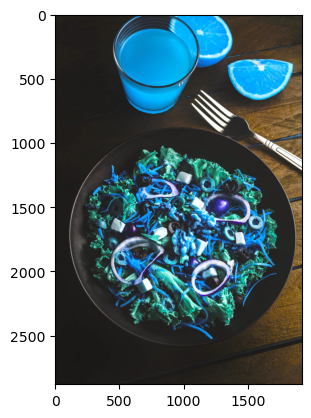

In [23]:
plt.imshow(img) #bgr

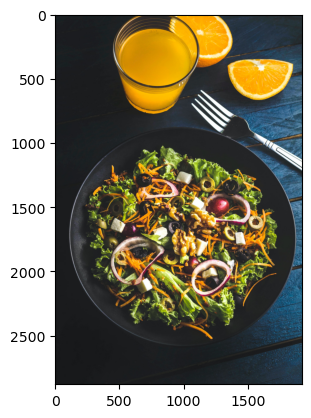

In [24]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [26]:
classIndex, confidece,bbox=model.detect(img,confThreshold=0.5)


In [27]:
print(classIndex)

[51 55 48 67 55 56 51 56 56 47 49 56]


In [30]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for classInd,conf,boxes in zip(classIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classlabels[classInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

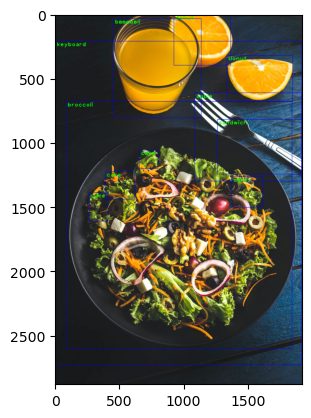

In [31]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [32]:
img1=cv2.imread(r'C:\Users\Subhanghi\Downloads\post8.jpeg')

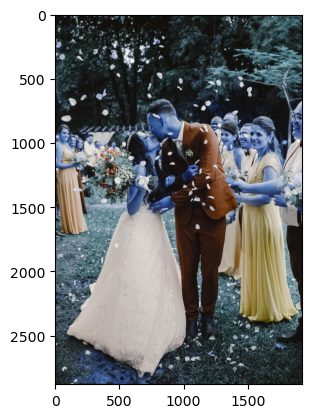

In [33]:
plt.imshow(img1)

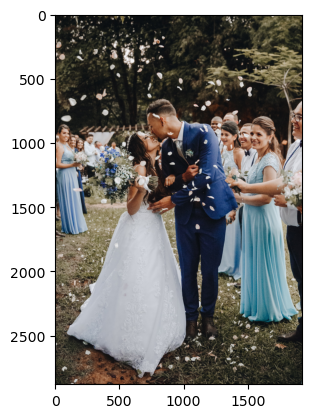

In [34]:
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

In [35]:
classIndex, confidece,bbox=model.detect(img1,confThreshold=0.5)

In [36]:
print(classIndex)

[1 1 1 1 1 1 1]


In [37]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for classInd,conf,boxes in zip(classIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img1,boxes,(255,0,0),2)
    cv2.putText(img1,classlabels[classInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

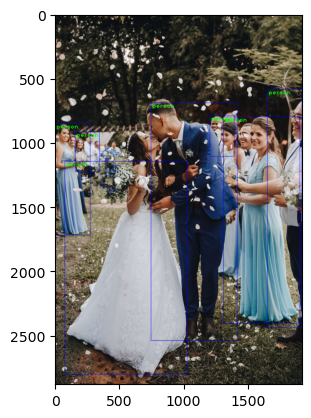

In [38]:
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))